**Support Vector Regression Practical Implementation**


***Importing Libraries***

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
data = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [77]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [78]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [80]:
data.drop('Serial No.',axis=1,inplace=True)

In [81]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [83]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

*Checking Distribution of Features*

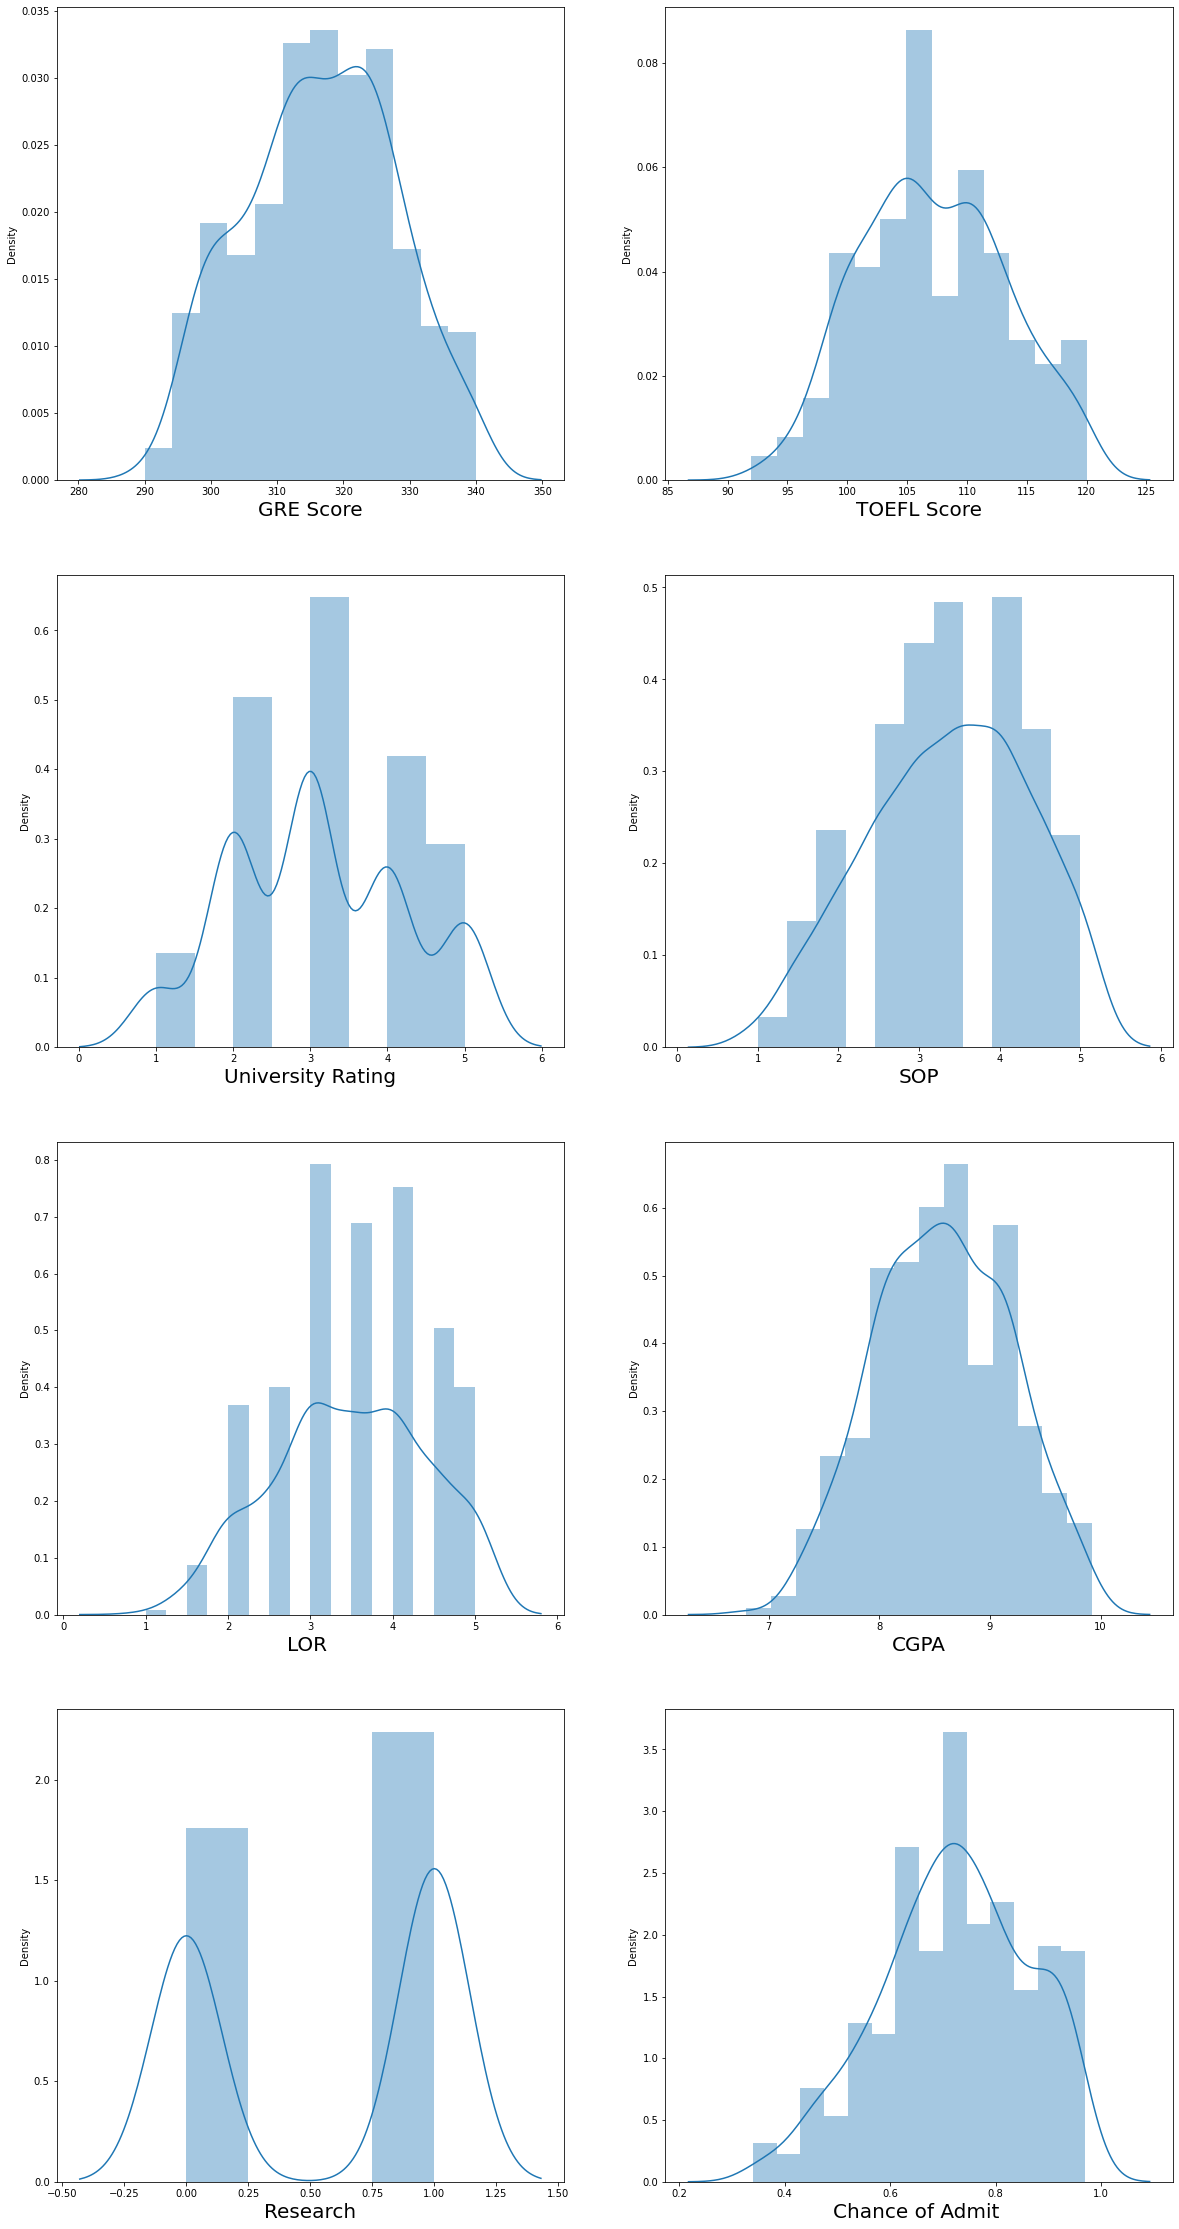

In [84]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :     # as there are 8 columns in the data
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

*Checking Distribution of Target Feature*

*Checking Correlation using heatmap*

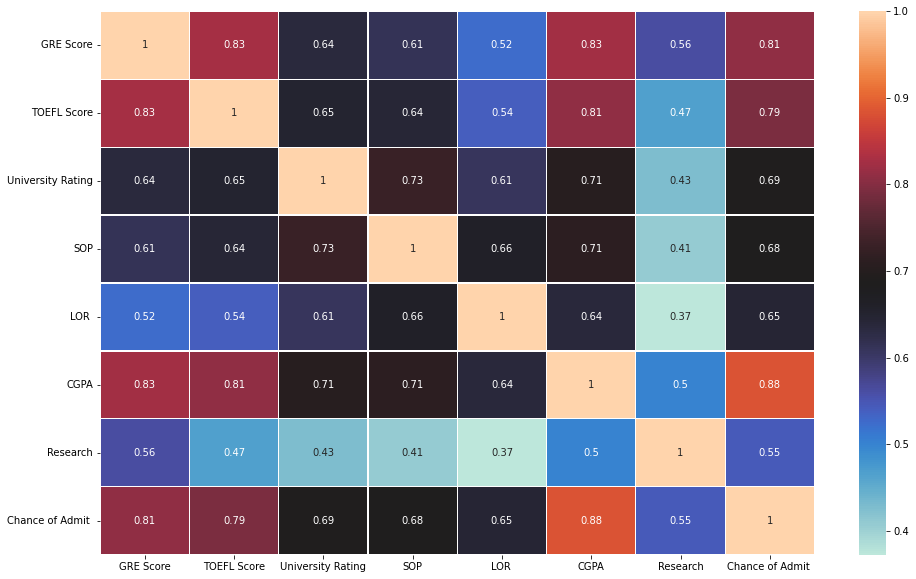

In [85]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix

**Creating Independent Features**

In [86]:
X = data.drop('Chance of Admit ',axis=1)

In [87]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


**Creating Dependent Features**

In [88]:
y = data['Chance of Admit ']

In [89]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

**SVR Model Training**

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)

In [92]:
from sklearn.svm import SVR
classifier=SVR(kernel="rbf")
classifier.fit(X_train,y_train)

SVR()

In [93]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [94]:
y_pred

array([0.61165723, 0.74324364, 0.67876699, 0.86483176, 0.6953349 ,
       0.67677106, 0.65661927, 0.74165954, 0.69323953, 0.69434529,
       0.4642039 , 0.46399154, 0.88523663, 0.73997869, 0.69397441,
       0.57678022, 0.62181539, 0.87284243, 0.75453787, 0.81162128,
       0.78235114, 0.60859143, 0.72615991, 0.78906609, 0.85933252,
       0.65541847, 0.58592771, 0.70857278, 0.61147595, 0.51188984,
       0.57671137, 0.67932053, 0.83794615, 0.7082672 , 0.80371646,
       0.79325252, 0.52009628, 0.71463621, 0.59726077, 0.86182714,
       0.68509334, 0.60394616, 0.7995104 , 0.85832786, 0.63557538,
       0.85717898, 0.868344  , 0.64898688, 0.66093687, 0.54541543,
       0.74198678, 0.7299681 , 0.71458593, 0.48396443, 0.4666125 ,
       0.8730518 , 0.72202506, 0.7771228 , 0.51815362, 0.70842934,
       0.7437248 , 0.6281241 , 0.68042451, 0.6133902 , 0.60091235,
       0.67076079, 0.55122723, 0.74947914, 0.66961537, 0.66583681,
       0.84667257, 0.47359682, 0.61288998, 0.70477486, 0.65598

In [95]:
classifier.score(X_test,y_test)

0.6327437912160307